# FILM ANALYSIS FOR A STUDIO NEW TO THE FILM INDUSTRY

### Authors
Calvince Kaunda 

Dennis Mwania

Kavata Musyoka

Tabby Mirara


### Overview

In this project we will analyse recent box office data to find out which types of movies are most popular and profitable.We will look at movie genres,  preferences and release date. Based on this information we will recommend the best type of movies our studio should focus on to make an impactful start and long-term profits.

### Business Understanding
The main goal is to understand what type of movie are making the most money so our new studio can be successful. This involves finding out ;

 1.Which genres are performing well at the box office. 

 2.What is the financial success of different films. 

 3.What is the critical reception and rating of different genres. 

 4.When do movie release perform best. 

By using this information, the studio can make smarter decisions and create films that attract large audience and generate long-term profits.


### Data Understanding
We will obtain our data fromthe following sources

**Box Office Mojo**- contains a comprehensive box office revenue data.

**IMDB** - contains a rich source of movie ratings genres and other detailed movie information.

**Rotten Tomatoes**- this offers crictical and audience reviews and ratings.

**TheMovieDB**- contains detailed movie information,including genres rating, and runtime.

**The Numbers**- has the financial data on movie budget and the grosses.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import sqlite3
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
#connect to the database
conn = sqlite3.connect('im.db')
cursor = conn.cursor()

In [3]:
#View the table names for IMDB 
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


The needed tables are movie_ratings and movie_basics

In [4]:
#load relevant tables to the database

movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

In [5]:
# view top records
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


We are going to merge or join the two major tables and prepare the joined table for analysis

In [7]:
imdb_join_query = """SELECT *
                     FROM movie_basics mb
                     JOIN movie_ratings mr
                     ON mb.movie_id = mr.movie_id
"""

In [8]:
#view the joined tables
pd.read_sql(imdb_join_query, conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [9]:
#assign the variable imdb_data to the joined tables
imdb_data = pd.read_sql(imdb_join_query, conn)
imdb_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [10]:
#load other datasets
rotten_tomatoes_movie_info = pd.read_csv('rt.movie_info.tsv.gz', sep='\t', compression ='gzip', encoding = 'latin1')
rotten_tomatoes_reviews = pd.read_csv('rt.reviews.tsv.gz', sep = '\t', compression = 'gzip', encoding = 'latin1')
the_movie_data = pd.read_csv('tmdb.movies.csv.gz', delimiter = ',', compression = 'gzip', encoding = 'latin1')
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz', delimiter = ',', compression = 'gzip', encoding = 'latin1')
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz', delimiter = ',', compression = 'gzip', encoding = 'latin1') 

In [11]:
# Display  various column names

#rotten tomatoes movie info and reviews
rotten_tomatoes_movie_info.columns
rotten_tomatoes_reviews.columns

# movie data colums
the_movie_data.columns


Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [12]:
#view first few records box office movie gross
#bom_movie_gross.head()

#first few for movie budgets
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Data cleaning 

#### 1. IMDB dataset

We first check for any missing values in the IMDB database we first connected to.

In [13]:
#check for any missing values
imdb_data.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id              0
averagerating         0
numvotes              0
dtype: int64

It is clear the 'runtime_minutes' and 'genres' columns have missing values.
Movies of the same genre generally have approximately the same running times hence we can use a measure of central tendancy, that is, the
Median which is sutable as it is not affected by extreme values


In [14]:
#Runtime_minutes column

#fill na values in the runtime_minutes column with the median for the whole column

imdb_data['runtime_minutes'] = imdb_data['runtime_minutes'].fillna(imdb_data['runtime_minutes'].median())

In [15]:
imdb_data['runtime_minutes'].isna().sum()


0

In [16]:
#Genres column
imdb_data['genres'] = imdb_data['genres'].fillna("Unknown")

 We can confirm whether there are any missing values

In [17]:
#check for missing values again
imdb_data.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64

We can check for any duplcates as well

In [18]:
#Checking for duplicates
imdb_data.duplicated().sum()

0

#### 2.Rotten Tomatoes Movie Info dataset

We check for missing and duplicate values in the Rotten Tomatoes Movie Info TSv file

In [19]:
#View Columns
rotten_tomatoes_movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [20]:
#check for any missing values
rotten_tomatoes_movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

We have multiple columns with missing values 

In [21]:
# Fill missing values for each column based on context

# We can use 'No synopsis' for missing values in the synopsis column
rotten_tomatoes_movie_info['synopsis'] = rotten_tomatoes_movie_info['synopsis'].fillna("No synopsis")  

In [22]:
x = rotten_tomatoes_movie_info['rating'].mode()
x[0]

'R'

In [23]:
#for rating we can use the most common rating to fill in the missing values
rotten_tomatoes_movie_info['rating'].mode()
#the most common rating is 'R' and we fill this in the missing values
rotten_tomatoes_movie_info['rating'] = rotten_tomatoes_movie_info['rating'].mode()[0]


In [24]:
rotten_tomatoes_movie_info.isna().sum()

id                 0
synopsis           0
rating             0
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

The columns Genre, director, writer, theater date, dvd date  and studio also have missing values and we can replace all their missing values using 'Unknown'

In [25]:
rotten_tomatoes_movie_info[['genre', 'director', 'writer', 'theater_date', 'dvd_date', 'studio']] = rotten_tomatoes_movie_info[['genre', 'director', 'writer', 'theater_date', 'dvd_date', 'studio']].fillna('Unknown')

In [26]:
#confirm any missing values in the 3 columns genre,director, writer, theater date, dvd date
rotten_tomatoes_movie_info.isna().sum()

id                 0
synopsis           0
rating             0
genre              0
director           0
writer             0
theater_date       0
dvd_date           0
currency        1220
box_office      1220
runtime           30
studio             0
dtype: int64

In [27]:
#view the values on the currency column
rotten_tomatoes_movie_info['currency'].unique()

array([nan, '$'], dtype=object)

In [28]:
#fill nan values with 'USD'
rotten_tomatoes_movie_info[['currency']] = rotten_tomatoes_movie_info[['currency']].fillna('USD')

#fill $ values with 'USD'
rotten_tomatoes_movie_info['currency'] = rotten_tomatoes_movie_info['currency'].replace('$', 'USD')

#confirm we dont have missing values and the currency is in USD
rotten_tomatoes_movie_info['currency'].unique()
rotten_tomatoes_movie_info['currency'].isna().sum()

0

In [29]:
#Missing values in the box office coluns are replaced by 0
rotten_tomatoes_movie_info['box_office'] = rotten_tomatoes_movie_info['box_office'].fillna(0)

#confirm changes
rotten_tomatoes_movie_info['box_office'].isna().sum()

0

In [30]:
rotten_tomatoes_movie_info['runtime'] = rotten_tomatoes_movie_info['runtime'].fillna(0)

In [31]:
rotten_tomatoes_movie_info['runtime'].isna().sum()

0

In [32]:
#Checking for duplicates
rotten_tomatoes_movie_info.duplicated().sum()

0

It is evident there are are no duplicate values

#### 3.Rotten Tomatoes Reviews dataset

In [33]:
#Identify missing values on the Rotten Tomatoes Reviews dataset
rotten_tomatoes_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

We first replace missing values in the rating column with 'No review available'

In [34]:
#replace missing values on the reviews column
rotten_tomatoes_reviews['review'] = rotten_tomatoes_reviews['review'].fillna('No review available')

In [35]:
#confirm changes
rotten_tomatoes_reviews['review'].isna().sum()

0

It is evident that the 'rating' column has multiple missing values.      
We cannot drop all these rows hence we can impute the missing values with the median of the values available.

In [36]:
#convert the ratings that are in fractions to floating point numbers
numeric_ratings = rotten_tomatoes_reviews['rating'].str.extract(r'(\d+(\.\d+)?)/\d+')
numeric_ratings = numeric_ratings[0].astype(float)

#fill missing values with median of the column 'rating'
rotten_tomatoes_reviews['rating'] = numeric_ratings.fillna(numeric_ratings.median())


In [37]:
#confirm changes in the rating column
rotten_tomatoes_reviews['rating'].isna().sum()

0

In [38]:
#check for duplicated
rotten_tomatoes_reviews['critic'].duplicated().sum()

50935

Duplicated values indicate that a critic has analysed multiple films and we are interested in the number of reviews from each critic.

In [39]:
rotten_tomatoes_reviews['critic'].value_counts()

Emanuel Levy       595
Roger Ebert        461
Dennis Schwartz    413
Nell Minow         372
Frank Swietek      348
                  ... 
Vera Bermuda         1
David Michael        1
Laura DeMarco        1
Mitch Lillie         1
Bob Cannon           1
Name: critic, Length: 3496, dtype: int64

In [40]:
rotten_tomatoes_reviews.isna().sum()

id               0
review           0
rating           0
fresh            0
critic        2722
top_critic       0
publisher      309
date             0
dtype: int64

In [41]:
#view unique values in column publisher
rotten_tomatoes_reviews['publisher'].unique()

array(['Patrick Nabarro', 'io9.com', 'Stream on Demand', ...,
       'The Big Issue (Australia)', 'The Jacobin', 'OZY'], dtype=object)

Both the 'Critic' and 'Publisher' columns have missing values and can be replaced with the word 'Unknown'

In [42]:
rotten_tomatoes_reviews[['critic', 'publisher']] = rotten_tomatoes_reviews[['critic', 'publisher']].fillna('Unknown')

#confirm changes
rotten_tomatoes_reviews.isna().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

We no longer have missing values in this dataset

In [43]:
#Checking for duplicates
rotten_tomatoes_reviews.duplicated().sum()

9

We do not have a large number of duplicates hence it is easier to drop them.

In [44]:
rotten_tomatoes_reviews.drop_duplicates(inplace=True)

#confirm changes
rotten_tomatoes_reviews.duplicated().sum()


0

#### 4.The Movie Data dataset

In [45]:
#check for missing values i.e null values
the_movie_data.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [46]:
#check occurrence of any of N/A, Unkown, Null and ""
missing = ["N/A", "Unknown", "null", "", "Null"]
for x in missing:
    print(f"Occurrences of '{x}':")
    print((the_movie_data == x).sum())


Occurrences of 'N/A':
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
Occurrences of 'Unknown':
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       1
popularity           0
release_date         0
title                1
vote_average         0
vote_count           0
dtype: int64
Occurrences of 'null':
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
Occurrences of '':
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title               

It is evident that The Movie Dataset does not have any missing values

In [47]:
#check for duplicates
the_movie_data.duplicated().sum()

0

We also do not have any duplicate values

#### 5. The Numbers Movie-Budgets dataset

In [48]:
#Check for missing values
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [49]:
#Check for missing values
for x in missing:
    print(f"Occurrences of '{x}':")
    print((tn_movie_budgets == x).sum())

Occurrences of 'N/A':
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
Occurrences of 'Unknown':
id                   0
release_date         0
movie                2
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
Occurrences of 'null':
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
Occurrences of '':
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
Occurrences of 'Null':
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


The dataset of Movie budgets from The Numbers does not have any missing values

In [50]:
#check for duplicates
tn_movie_budgets.duplicated().sum()

0

There are no duplicates in this dataset too

In [51]:
tn_movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

#### 6. Box Office Movies Gross dataset

In [52]:
#Check for missing values
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [53]:
#Check for missing values
for x in missing:
    print(f"Occurrences of '{x}':")
    print((bom_movie_gross == x).sum())

Occurrences of 'N/A':
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64
Occurrences of 'Unknown':
title             1
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64
Occurrences of 'null':
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64
Occurrences of '':
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64
Occurrences of 'Null':
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [54]:
#Check for missing values
bom_movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [55]:
#check for duplicates
bom_movie_gross.duplicated().sum()

0

This dataset does not have duplicate and missing values

# Joining the datasets

#### 1. Box office Movie Gross dataset and The Numbers Movie Budgets

We are going to merge the above 2 datasets and clean further

In [56]:
# Check columns in tn_movie_budgets
print(tn_movie_budgets.columns)

# Check columns in bom_movie_gross
print(bom_movie_gross.columns)

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


The columns title and movie can be used for joinig the 2 datasets.       
We can first rename the 'movie' column in The Numbers Movie dataset 

In [57]:
#rename 'movie' column to 'title'
tn_movie_budgets = tn_movie_budgets.rename(columns={'movie': 'title'})

In [58]:
#remove irrelevant characters to help allow for easier analysis
tn_movie_budgets[['domestic_gross', 'production_budget', 'worldwide_gross']] = tn_movie_budgets[['domestic_gross', 'production_budget', 'worldwide_gross']].replace({'\$': '', ',': ''}, regex = True)

We can now merge the two datasets

In [59]:
#Create uniformity in the two columns
# Clean columns to remove spaces and convert to lowercase
tn_movie_budgets['title'] = tn_movie_budgets['title'].str.strip().str.lower()
bom_movie_gross['title'] = bom_movie_gross['title'].str.strip().str.lower()

# Create a temporary SQlite database
conn = sqlite3.connect(':memory:')

# Load the cleaned DataFrames into SQLite
#index = false ensures index is not being written as a column
#if_exists replaces any tables with the same names
tn_movie_budgets.to_sql('tn_movie_budgets', conn, index = False, if_exists = 'replace')
bom_movie_gross.to_sql('bom_movie_gross', conn, index = False, if_exists = 'replace')

#SQL join query1
query1 = """
SELECT a.*, b.*
FROM tn_movie_budgets a
LEFT JOIN bom_movie_gross b
ON a.title = b.title

"""

# Execute the query1 and load the result into a DataFrame
merged1 = pd.read_sql_query(query1, conn)

# Close the connection
conn.close()

# Display the merged dataset

merged1

#merged1 = BOM Gross and The Numbers Movie budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,title,studio,domestic_gross,foreign_gross,year
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279,None,None,NaN,None,NaN
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,pirates of the caribbean: on stranger tides,BV,241100000.0,804600000,2011.0
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350,None,None,NaN,None,NaN
3,4,"May 1, 2015",avengers: age of ultron,330600000,459005868,1403013963,avengers: age of ultron,BV,459000000.0,946400000,2015.0
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,317000000,620181382,1316721747,None,None,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",red 11,7000,0,0,None,None,NaN,None,NaN
5778,79,"Apr 2, 1999",following,6000,48482,240495,None,None,NaN,None,NaN
5779,80,"Jul 13, 2005",return to the land of wonders,5000,1338,1338,None,None,NaN,None,NaN
5780,81,"Sep 29, 2015",a plague so pleasant,1400,0,0,None,None,NaN,None,NaN


#### Clean the merged dataset

In [60]:
merged1.isna().sum()

id                      0
release_date            0
title                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
title                4495
studio               4496
domestic_gross       4497
foreign_gross        4662
year                 4495
dtype: int64

In [61]:
#Drop missing values
merged1.dropna(inplace = True)

#confirm changes
print(merged1.isna().sum())

id                   0
release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
title                0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64


In [62]:
merged1.duplicated().sum()

0

We do not have any duplicate values

#### 2. Rotten Tomatoes Movies Info and Rotten Tomatoes Reviews dataset

In [63]:
rotten_tomatoes_movie_info['id']

0          1
1          3
2          5
3          6
4          7
        ... 
1555    1996
1556    1997
1557    1998
1558    1999
1559    2000
Name: id, Length: 1560, dtype: int64

In [64]:
rotten_tomatoes_reviews['id']

0           3
1           3
2           3
3           3
4           3
         ... 
54427    2000
54428    2000
54429    2000
54430    2000
54431    2000
Name: id, Length: 54423, dtype: int64

In [65]:
# Create a temporary SQlite database
conn = sqlite3.connect(':memory:')

# Load the cleaned DataFrames into SQLite
#index = false ensures index is not being written as a column
#if_exists replaces any tables with the same names
rotten_tomatoes_movie_info.to_sql('rotten_tomatoes_movie_info', conn, index = False, if_exists = 'replace')
rotten_tomatoes_reviews.to_sql('rotten_tomatoes_reviews', conn, index = False, if_exists = 'replace')

#SQL join query2
query2 = """
SELECT c.*, d.*
FROM rotten_tomatoes_movie_info c
LEFT JOIN rotten_tomatoes_reviews d
ON c.id = d.id

"""

# Execute the query2 and load the result into a DataFrame
merged2 = pd.read_sql_query(query2, conn)

# Close the connection
conn.close()

# Display the merged dataset
merged2

#merged2 = Rotten Movie Info and Rotten Reviews

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id,review,rating,fresh,critic,top_critic,publisher,date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",USD,0,104 minutes,Unknown,NaN,None,NaN,None,None,NaN,None,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",USD,"600,000",108 minutes,Entertainment One,3.0,... Cronenberg's Cosmopolis expresses somethin...,3.0,fresh,Michelle Orange,0.0,Capital New York,"September 11, 2017"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",USD,"600,000",108 minutes,Entertainment One,3.0,"... a movie about a sentient zombie, trapped i...",3.0,fresh,Philip Martin,0.0,Arkansas Democrat-Gazette,"September 7, 2012"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",USD,"600,000",108 minutes,Entertainment One,3.0,... a perverse twist on neorealism...,3.0,fresh,Unknown,0.0,Cinema Scope,"October 12, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",USD,"600,000",108 minutes,Entertainment One,3.0,... life lived in a bubble in financial dealin...,3.0,fresh,Sean Axmaker,0.0,Stream on Demand,"January 4, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54843,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,Unknown,Luc Besson,"Sep 27, 2001","Feb 11, 2003",USD,0,94 minutes,Columbia Pictures,2000.0,The movie fails to live up to the sum of its p...,3.0,rotten,Judith Prescott,1.0,Hollywood Reporter,"February 5, 2003"
54844,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,Unknown,Luc Besson,"Sep 27, 2001","Feb 11, 2003",USD,0,94 minutes,Columbia Pictures,2000.0,The real charm of this trifle is the deadpan c...,3.0,fresh,Laura Sinagra,1.0,Village Voice,"September 24, 2002"
54845,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,Unknown,Luc Besson,"Sep 27, 2001","Feb 11, 2003",USD,0,94 minutes,Columbia Pictures,2000.0,The spaniel-eyed Jean Reno infuses Hubert with...,3.0,fresh,Megan Turner,1.0,New York Post,"September 27, 2002"
54846,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,Unknown,Luc Besson,"Sep 27, 2001","Feb 11, 2003",USD,0,94 minutes,Columbia Pictures,2000.0,Wasabi does its job colorfully and entertainin...,3.0,fresh,Sean Axmaker,0.0,Seattle Post-Intelligencer,"October 3, 2002"


#### Clean the second merged dataset

In [66]:
merged2.isna().sum()

id                0
synopsis          0
rating            0
genre             0
director          0
writer            0
theater_date      0
dvd_date          0
currency          0
box_office        0
runtime           0
studio            0
id              425
review          425
rating          425
fresh           425
critic          425
top_critic      425
publisher       425
date            425
dtype: int64

In [67]:
#Drop missing values
merged2.dropna(inplace = True)

#confirm changes
print(merged2.isna().sum())

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
id              0
review          0
rating          0
fresh           0
critic          0
top_critic      0
publisher       0
date            0
dtype: int64


In [68]:
merged2.duplicated().sum()

0

We do not have duplicates in the second merged dataframe

#### 3.  IMDB dataset and The Movie Data dataset

In [69]:
#view last few records
imdb_data.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,91.0,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,91.0,Unknown,tt9914942,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,tt9916160,6.5,11


In [70]:
#view columns
imdb_data.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes'],
      dtype='object')

In [71]:
#identify if there are any duplicates in the columns
imdb_data.columns.duplicated()

#value of true indicates the column is a duplicate

array([False, False, False, False, False, False,  True, False, False])

The column 'movie_id' has been repeated and we need to drop duplicates

In [72]:
#remove duplicate columns
imdb_data = imdb_data.loc[:,~imdb_data.columns.duplicated()].copy()

In [73]:
#confirm changes
imdb_data.columns.duplicated()

array([False, False, False, False, False, False, False, False])

In [74]:
the_movie_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [75]:
# Create a temporary SQlite database
conn = sqlite3.connect(':memory:')

# Load the cleaned DataFrames into SQLite
#index = false ensures index is not being written as a column
#if_exists replaces any tables with the same names
imdb_data.to_sql('imdb_data', conn, index = False, if_exists = 'replace')
the_movie_data.to_sql('the_movie_data', conn, index = False, if_exists = 'replace')

#SQL join query2
query3 = """
SELECT e.*, f.*
FROM imdb_data e
JOIN the_movie_data f
ON e.original_title = f.original_title

"""

# Execute the query2 and load the result into a DataFrame
merged3 = pd.read_sql_query(query3, conn)

# Close the connection
conn.close()

# Display the merged dataset
merged3

#merged3 = IMDB and TMDB

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,91.0,"Horror,Thriller",4.1,32,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,8456,"[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,Foodfight!,2.1,46
3,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,9600,"[35, 18]",323498,en,Return to Babylon,0.877,2013-08-11,Return to Babylon,7.0,1
4,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,1243,[35],112074,en,Life's a Beach,1.206,2010-01-01,Life's a Beach,3.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17617,tt9899880,Columbus,Columbus,2018,85.0,Comedy,5.8,5,20943,[18],414453,en,Columbus,8.964,2017-08-04,Columbus,7.3,130
17618,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8,46,"[28, 53]",44048,en,Unstoppable,14.010,2010-11-12,Unstoppable,6.4,1913
17619,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8,10970,[99],217664,en,Unstoppable,0.600,2013-09-24,Unstoppable,1.6,4
17620,tt9914642,Albatross,Albatross,2017,91.0,Documentary,8.5,8,5611,[18],72842,en,Albatross,5.624,2012-01-02,Albatross,6.2,48


#### Clean the third merged dataset

In [76]:
merged3.isna().sum()

movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

We don't have any missing values

In [77]:
merged3.duplicated().sum()

0

We do not have any duplicate values

In [78]:
# save the data into a csv file
merged1.to_csv('merged1', index = False)
# save the data into a csv file
merged2.to_csv('merged2', index = False)
# save the data into a csv file
merged3.to_csv('merged3', index = False)

### Data Analysis

#### Analysis of merged datasets

In [79]:
#merged1 = box office movies gross and the numbers movie budgets
print(merged1.columns)

#merged2 = rotten tomatoes movie info and rotten tomatoes reviews
print(merged2.columns)

#merged3 = IMDB an the movie database
print(merged3.columns)

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'title', 'studio', 'domestic_gross', 'foreign_gross',
       'year'],
      dtype='object')
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio', 'id', 'review', 'rating', 'fresh', 'critic', 'top_critic',
       'publisher', 'date'],
      dtype='object')
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'Unnamed: 0',
       'genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


To analyse our data we will need to answer questions with refence to our business problem:

    1.Which Genre of movies have the best ratings        
    2.What is the box office revenue of different genres       
    3.When are the different genres released and how do they perfom on monthtly basis
   

In [80]:
print(merged1.columns.duplicated())

print(merged2.columns.duplicated())

print(merged3.columns.duplicated())

[False False False False False False  True False  True False False]
[False False False False False False False False False False False False
  True False  True False False False False False]
[False False False False False False False False False False False False
  True False False False False False]


All Our merged datasets have duplicate values and we can handle all duplicate values

In [81]:
merged1 = merged1.loc[:,~merged1.columns.duplicated()].copy()
merged2 = merged2.loc[:,~merged2.columns.duplicated()].copy()
merged3 = merged3.loc[:,~merged3.columns.duplicated()].copy()

In [82]:
#confirm changes
print(merged1.columns.duplicated())

print(merged2.columns.duplicated())

print(merged3.columns.duplicated())

[False False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False]
[False False False False False False False False False False False False
 False False False False False]


###  1.Which genres are performing well at the box office.

#### Performace based on genre and worldwide gross

In [83]:
#merge based on id
genre_best_gross = pd.merge(merged1, merged2, on = 'id')

In [84]:
genre_best_gross.isna().sum()

id                   0
release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
studio_x             0
foreign_gross        0
year                 0
synopsis             0
rating               0
genre                0
director             0
writer               0
theater_date         0
dvd_date             0
currency             0
box_office           0
runtime              0
studio_y             0
review               0
fresh                0
critic               0
top_critic           0
publisher            0
date                 0
dtype: int64

In [85]:
genre_best_gross.duplicated().sum()

22

In [86]:
#drop duplicates
genre_best_gross.drop_duplicates(inplace=True)

In [87]:
genre_best_gross['worldwide_gross'] = pd.to_numeric(genre_best_gross['worldwide_gross'], errors = 'coerce')

In [88]:
successful_genre = genre_best_gross.groupby('genre')['worldwide_gross'].sum().reset_index()
sorted_successful_genre = successful_genre.sort_values(by = 'worldwide_gross', ascending = True)

top_10_most_successful_genres = sorted_successful_genre.tail(10)
top_10_most_successful_genres

,genre,worldwide_gross
27,Comedy|Musical and Performing Arts,167479741755
24,Comedy|Drama|Romance,175709503368
36,Drama|Sports and Fitness,189837684375
39,Unknown,243584882616
13,Art House and International|Comedy|Drama|Music...,280874444200
29,Comedy|Romance,334695431181
9,Action and Adventure|Mystery and Suspense,387179350320
23,Comedy|Drama,741196880346
22,Comedy,865479560559
31,Drama,1172533187376


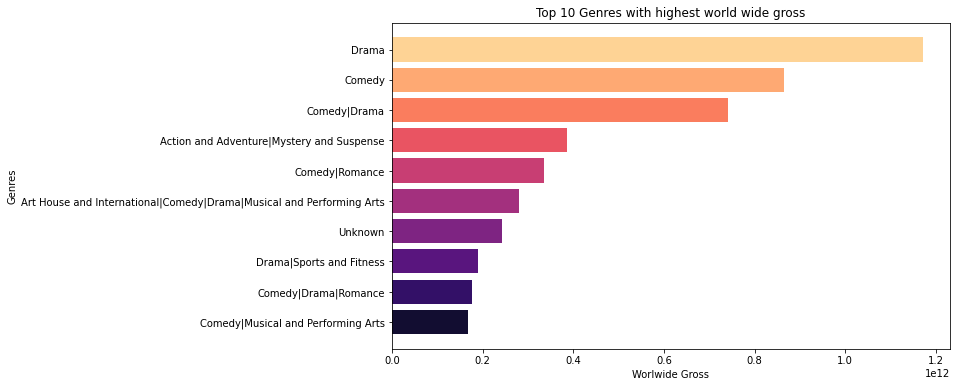

In [89]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette('magma', len(top_10_most_successful_genres))
plt.barh(top_10_most_successful_genres['genre'], top_10_most_successful_genres['worldwide_gross'], color=colors)

plt.ylabel('Genres')
plt.xlabel('Worlwide Gross')
plt.title('Top 10 Genres with highest world wide gross')

plt.show()

#### Save cleaned data as an excel file


In [90]:
# Save the top ten genres data to an Excel file
top_10_most_successful_genres.to_excel('top_10_most_successful_genres.xlsx', index=False)

######  Findings
From our visualization Drama is the most successful genre of film with the highest worldwide gross.  
It is followed by Comedy and Comedy|Drama genres which are the second highest respectively.  
Comedy|Musical and Performing Arts is the least of the top ten genres that are performing well

We dont have duplicate or missing values


### 2. What is the financial success of different films

We are going to analyse the relationship between the production budget and world gross of different films.

We merge our first merged dataset(BOM gross and The NUmbers Movie budgets).
This was already done previously and stored in the dataframe 'genre_best_gross'.

In [91]:
#call already merged dataset and view columns
genre_best_gross.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'studio_x', 'foreign_gross', 'year', 'synopsis',
       'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date',
       'currency', 'box_office', 'runtime', 'studio_y', 'review', 'fresh',
       'critic', 'top_critic', 'publisher', 'date'],
      dtype='object')

We can use the production budget column and worldwide gross columns to carry out ot analysis.

In [92]:
genre_best_gross['production_budget'] = pd.to_numeric(genre_best_gross['production_budget'], errors = 'coerce')

genre_best_gross['production_budget'].corr(genre_best_gross['worldwide_gross'])

0.7993105356567419

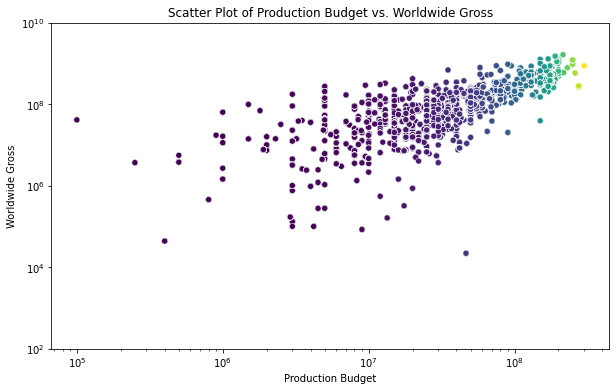

Correlation between Production Budget and Worldwide Gross: 0.80


In [93]:
# Scatter Plot for Production Budget vs. Worldwide Gross
plt.figure(figsize=(10, 6))

sns.scatterplot(data=genre_best_gross, x='production_budget', y='worldwide_gross', c=genre_best_gross['production_budget'], cmap='viridis')

plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.ylim(10**2, 10**10)
plt.title('Scatter Plot of Production Budget vs. Worldwide Gross')

# Setting logarithmic scale for better visibility
plt.xscale('log') 
plt.yscale('log')
plt.show()

# Calculating the correlation between production budget and worldwide gross
correlation = genre_best_gross[['production_budget', 'worldwide_gross']].corr().iloc[0, 1]
print(f'Correlation between Production Budget and Worldwide Gross: {correlation:.2f}')

In [94]:
# save the dataset to a csv file
genre_best_gross[['worldwide_gross', 'production_budget']].to_csv('correlation: production budget and worldwide gross', index = False)

##### Findings
A correlation coefficient of 0.80 suggests a stong positive linear relationship between production_budget and the  worldwide_gross.
This suggests that movies with higher repoduction costs tend to have higher worldwide revenues.  
It is a strong positive relationship however it does not guarantee that a higher production budget will result in 
higher worldwide costs

### 3.What is the critical reception and rating of different genres
We can then compare genres and average rating from the third merged dataset(IMDB and IMDB datasets)

In [95]:
# Group by 'genres' and calculate the mean of 'avg_rating' for each genre
highly_rated_genres = merged3.groupby('genres')['averagerating'].mean()

# Sort genres by average rating in descending order and select the top 10
top_ten_highly_rated_genres = highly_rated_genres.sort_values(ascending=False).head(10)

# Display the result
top_ten_highly_rated_genres

genres
Documentary,Family,Romance       9.70
Documentary,News,Reality-TV      8.80
Family,Romance                   8.70
Mystery,News,Thriller            8.40
Action,Sport                     8.40
Biography,Family,History         8.30
Animation,Documentary,Family     8.30
Adventure,Romance,Sci-Fi         8.30
Documentary,Drama,Thriller       8.25
Animation,Documentary,Mystery    8.20
Name: averagerating, dtype: float64

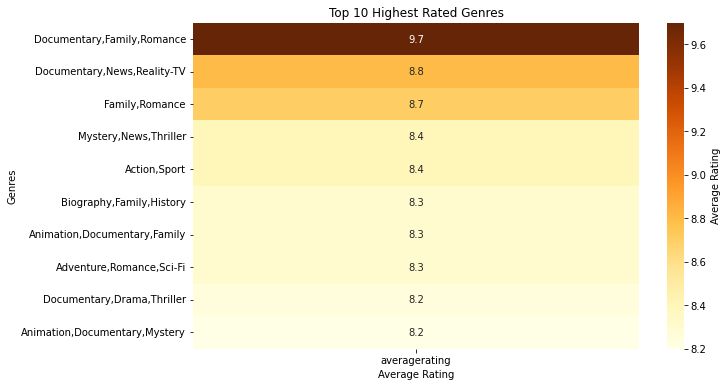

In [96]:
# Plotting a heatmap of the top 10 highly rated genres
plt.figure(figsize=(10, 6))
sns.heatmap(top_ten_highly_rated_genres.to_frame(), annot=True, cmap='YlOrBr', cbar_kws={'label': 'Average Rating'})
plt.title('Top 10 Highest Rated Genres')
plt.xlabel('Average Rating')
plt.ylabel('Genres')

plt.show()

In [97]:
# save the data into a csv file
top_ten_highly_rated_genres.to_csv('top_ten_highly_rated_genres', index = False)

##### Findings
This analysis shows that Documentary, Family, Romance is the highest-rated genre with an average rating of 9.7. 
This indicates they prefer heartfelt genres like documentaries, family, and romance.
Average ratings of news and reality TV indicate they appreciate real insights from news and reality TV.  
For excitement and stimulation, audiences seek out the thrill of mystery, action, and sports which have an average rating of 8.4

### 4.When do movie releases perfom best?
Releases can also be analysed to check their performance based on a monthly basis.

#### Monthly trend
The monthly trend for average worldwide gross across the year can be plotted for analysis.

In [98]:
genre_best_gross.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'studio_x', 'foreign_gross', 'year', 'synopsis',
       'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date',
       'currency', 'box_office', 'runtime', 'studio_y', 'review', 'fresh',
       'critic', 'top_critic', 'publisher', 'date'],
      dtype='object')

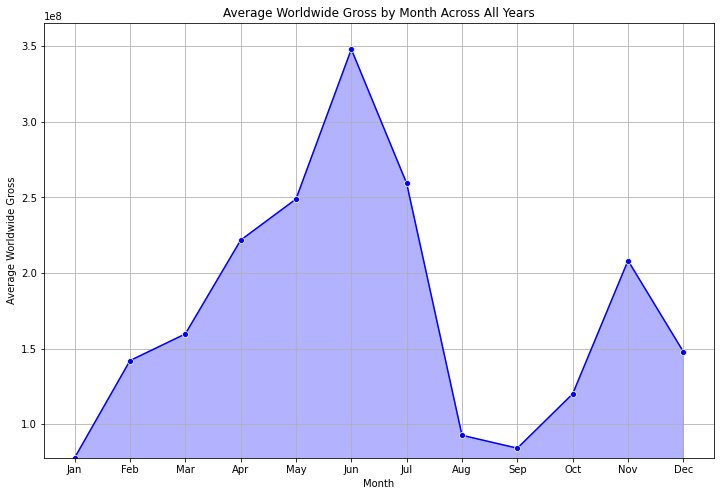

In [99]:
# Convert to numeric, forcing errors to NaN
genre_best_gross['worldwide_gross'] = pd.to_numeric(genre_best_gross['worldwide_gross'], errors='coerce')

genre_best_gross['release_date'] = pd.to_datetime(genre_best_gross['release_date'], errors='coerce')
genre_best_gross['month'] = genre_best_gross['release_date'].dt.month

# Group by month and calculate the average worldwide_gross for each month
monthly_trend = genre_best_gross.groupby('month')['worldwide_gross'].mean().reset_index()

# Plot the trend of average worldwide gross across the months
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the line graph with shading below the line
sns.lineplot(x='month', y='worldwide_gross', data = monthly_trend, marker = 'o', color = 'b', ax = ax)
ax.fill_between(monthly_trend['month'], monthly_trend['worldwide_gross'], color = 'blue', alpha = 0.3)

# Set the y-axis limit to start from the minimum value of worldwide_gross
ax.set_ylim(bottom = monthly_trend['worldwide_gross'].min())

#plot
plt.title('Average Worldwide Gross by Month Across All Years')
plt.xlabel('Month')
plt.ylabel('Average Worldwide Gross')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Show the plot
plt.show()

##### Findings
It is evident that releases between May and June have the highest average gross indicating that the peak months for movie releases and revenue generation are between May and June
Movies release between August and September have the least average gross.

## Recommendations

Focus on producing drama films- these films tend to attract a highest grossing genre.

Focus on creating high-quality Documentary, Family, and Romance films, because these genres have the highest audience ratings.

Schedule major film releases during May and June in order to take advantage of the peak movie season which will maximize box office revenue.

## Conclusion
Drama films are a huge source of revenue.

High quality Documentary, Family and Romance films attract viewers,leading to higher ratings and strong audience loyalty.

Peak release timing leads to higher box office revenue.
